<font size = 4 color='orange'>Diabeties prediction problem Models

<Font size=3 color='darkblue'>Importing Libraries

In [1]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import math #For mathematical opeartions
import matplotlib.pyplot as plt #To perform plotting
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix

<Font size=3 color='darkblue'>Reading the data

In [119]:
data_diabeties = pd.read_csv('Diabetes_data_after_EDA.csv')

Checking the head of the data

In [120]:
data_diabeties.head()

,cholesterol,glucose,chol_hdl_ratio,age,gender,bmi,systolic_bp,waist_hip_ratio,diabetes
0,220.0,60.0,3.3,26,male,21.5,136.0,0.85,Diabetes
1,194.0,186.0,5.1,29,female,24.7,120.0,0.83,Diabetes
2,191.0,155.0,3.3,31,female,43.3,140.0,0.95,Diabetes
3,245.0,119.0,5.2,36,male,28.9,150.0,0.88,Diabetes
4,203.0,186.0,4.7,38,female,42.5,136.0,0.87,Diabetes


<font size=2.5 color='Purple'>__Observations:__<br>
    1. We need to perform OHE to convert gender into numeric<br>
    2. We need to standardize the numericla data before passing it to the model

<Font size=3 color='darkblue'>Splitting the data into train and test

In [121]:
X = data_diabeties.drop('diabetes', axis=1) #Independent variables
y = data_diabeties['diabetes'].values #Predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<Font size=3 color='darkblue'>Peforming One Hot Encoding on the Categorical Features

In [122]:
vectorizer = CountVectorizer()

X_train_gender = vectorizer.fit_transform(X_train['gender'].values)
X_test_gender = vectorizer.transform(X_test['gender'].values)

<Font size=3 color='darkblue'>Peforming Standardization on the Categorical Features

In [123]:
scalar = StandardScaler()

#Standarizing the 'Cholestrol' feature
X_train_cholestrol = scalar.fit_transform(X_train['cholesterol'].values.reshape(1,-1)).T
X_test_cholestrol = scalar.fit_transform(X_test['cholesterol'].values.reshape(1,-1)).T

#Standarizing the 'glucose' feature
X_train_glucose = scalar.fit_transform(X_train['glucose'].values.reshape(1,-1)).T
X_test_glucose = scalar.fit_transform(X_test['glucose'].values.reshape(1,-1)).T

#Standarizing the 'chol_hdl_ratio' feature
X_train_chol_hdl_ratio = scalar.fit_transform(X_train['chol_hdl_ratio'].values.reshape(1,-1)).T
X_test_chol_hdl_ratio = scalar.fit_transform(X_test['chol_hdl_ratio'].values.reshape(1,-1)).T

#Standarizing the 'age' feature
X_train_age = scalar.fit_transform(X_train['age'].values.reshape(1,-1)).T
X_test_age = scalar.fit_transform(X_test['age'].values.reshape(1,-1)).T

#Standarizing the 'bmi' feature
X_train_bmi = scalar.fit_transform(X_train['bmi'].values.reshape(1,-1)).T
X_test_bmi = scalar.fit_transform(X_test['bmi'].values.reshape(1,-1)).T

#Standarizing the 'systolic_bp' feature
X_train_systolic_bp = scalar.fit_transform(X_train['systolic_bp'].values.reshape(1,-1)).T
X_test_systolic_bp = scalar.fit_transform(X_test['systolic_bp'].values.reshape(1,-1)).T

#Standarizing the 'waist_hip_ratio' feature
X_train_waist_hip_ratio = scalar.fit_transform(X_train['waist_hip_ratio'].values.reshape(1,-1)).T
X_test_waist_hip_ratio = scalar.fit_transform(X_test['waist_hip_ratio'].values.reshape(1,-1)).T

<Font size=3 color='darkblue'>Combining all the features

In [124]:
X_tr = hstack((X_train_age, X_train_bmi, X_train_chol_hdl_ratio, X_train_cholestrol, X_train_glucose, 
              X_train_systolic_bp, X_train_waist_hip_ratio, X_train_gender)).tocsr()
X_te = hstack((X_test_age, X_test_bmi, X_test_chol_hdl_ratio, X_test_cholestrol, X_test_glucose, 
              X_test_systolic_bp, X_test_waist_hip_ratio, X_test_gender)).tocsr()

<Font size=3 color='darkblue'>Creating a function to plot the Confusion, Precision and Recall Matrices

In [125]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20, 5))
    
    labels = ['Diabetes', 'No diabetes']
    
    # representing C in heatmap format
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap='coolwarm', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap='coolwarm', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1,3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap='coolwarm', fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.tight_layout()
    plt.show()

<font size = 4 color='orange'>Applying Logistic Regression

The Score for Logistic Regression is:  0.5256410256410257


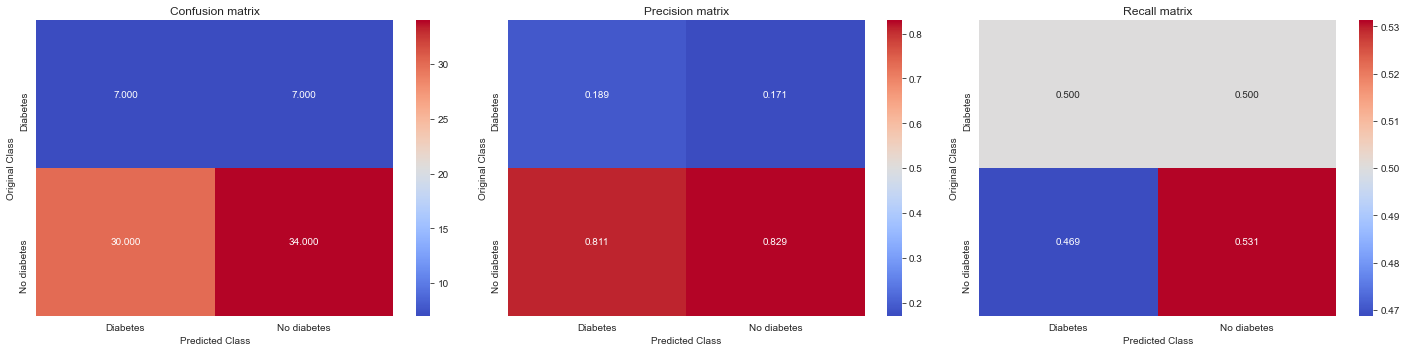

In [131]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced') #defining the model

logreg.fit(X_tr, y_train) #fitting on train data

print("The Score for Logistic Regression is: ", logreg.score(X_te, y_test))

y_pred = logreg.predict(X_te) #prediction on test data

plot_confusion_matrix(y_test, y_pred) #results

<font size = 4 color='orange'>Applying SVM

The Score for SVM is:  0.5256410256410257


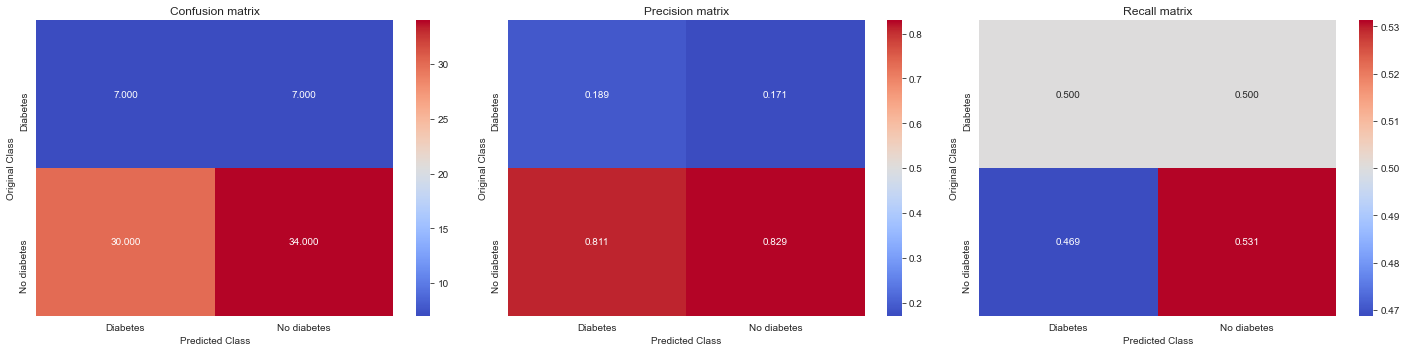

In [132]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced') #defining the model

svm.fit(X_tr, y_train) #fitting on train data

y_pred = svm.predict(X_te) #prediction on test data

print("The Score for SVM is: ", svm.score(X_te, y_test))


plot_confusion_matrix(y_test, y_pred) #results

<font size = 4 color='orange'>Applying Decision Trees

The Score for Decision Tree is:  0.5256410256410257


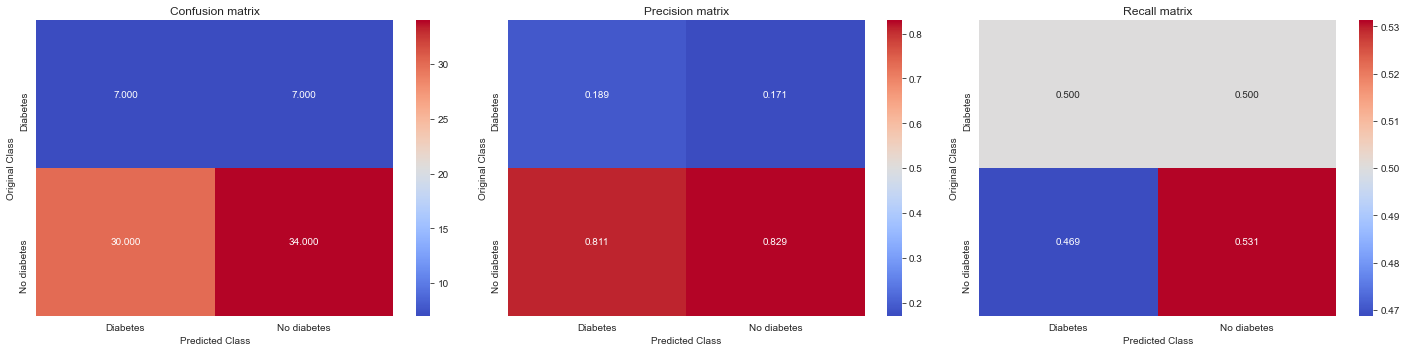

In [133]:
from sklearn.tree import DecisionTreeClassifier

Dec_Tree = DecisionTreeClassifier(class_weight='balanced') #defining the model

Dec_Tree.fit(X_tr, y_train) #fitting on train data

y_pred = Dec_Tree.predict(X_te) #prediction on test data

print("The Score for Decision Tree is: ", Dec_Tree.score(X_te, y_test))


plot_confusion_matrix(y_test, y_pred) #results

<font size = 4 color='orange'>Applying Random Forest

The Score for Random Forest is:  0.5256410256410257


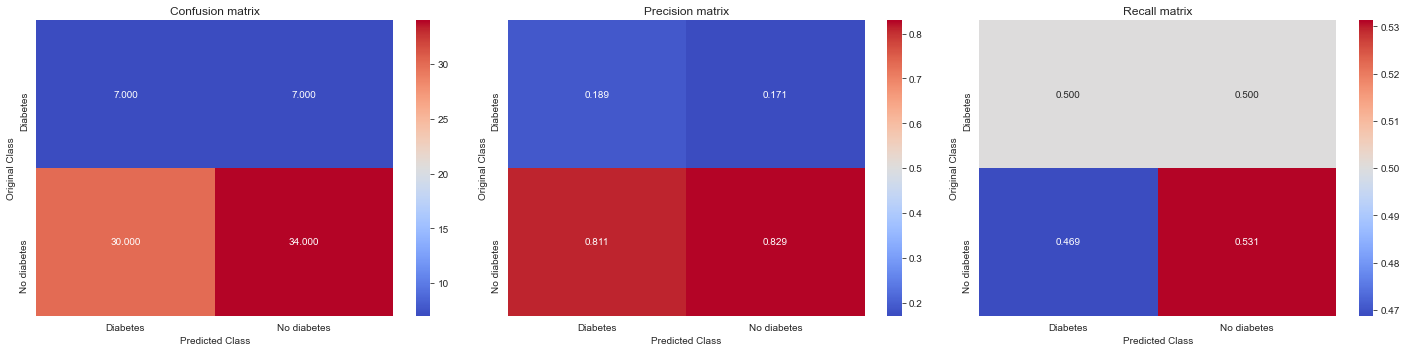

In [134]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(class_weight='balanced') #defining the model

ran_for.fit(X_tr, y_train) #fitting on train data

y_pred = ran_for.predict(X_te) #prediction on test data

print("The Score for Random Forest is: ", ran_for.score(X_te, y_test))

plot_confusion_matrix(y_test, y_pred) #results